In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ


In [2]:
def c_Uop(phi0,phi1,power):
    U = QuantumCircuit(1)        
    for _ in range(power):
        U.rz(-phi0*4*np.pi,0)
        U.p((phi1+phi0)*2*np.pi,0)
    U = U.to_gate()
    U.name = "c_U(%f ,%f)^%i" % (np.round(phi0,5), np.round(phi1,5),power)
    U = U.control()
    return U
    

In [3]:
t_seed=3

a0 = 2.
delta0 = 0.2
phi0 = (a0+delta0)*2.**(-t_seed) 

a1 = 3.
delta1 = 0.
phi1 =(a1+ delta1)*2.**(-t_seed) 

print('phi0=', phi0, ' ->   2^t*phi0 = a0 + delta0 = ', 2**t_seed*phi0 , ' , a0 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi0),'b').zfill(t_seed) )
print('phi1=', phi1, ' ->   2^t*phi1 = a1 + delta1 = ', 2**t_seed*phi1 , ' , a1 =' ,int(2**t_seed*phi1), '=>', format(int(2**t_seed*phi1),'b').zfill(t_seed) )


phi0= 0.275  ->   2^t*phi0 = a0 + delta0 =  2.2  , a0 = 2 => 010
phi1= 0.375  ->   2^t*phi1 = a1 + delta1 =  3.0  , a1 = 3 => 011


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


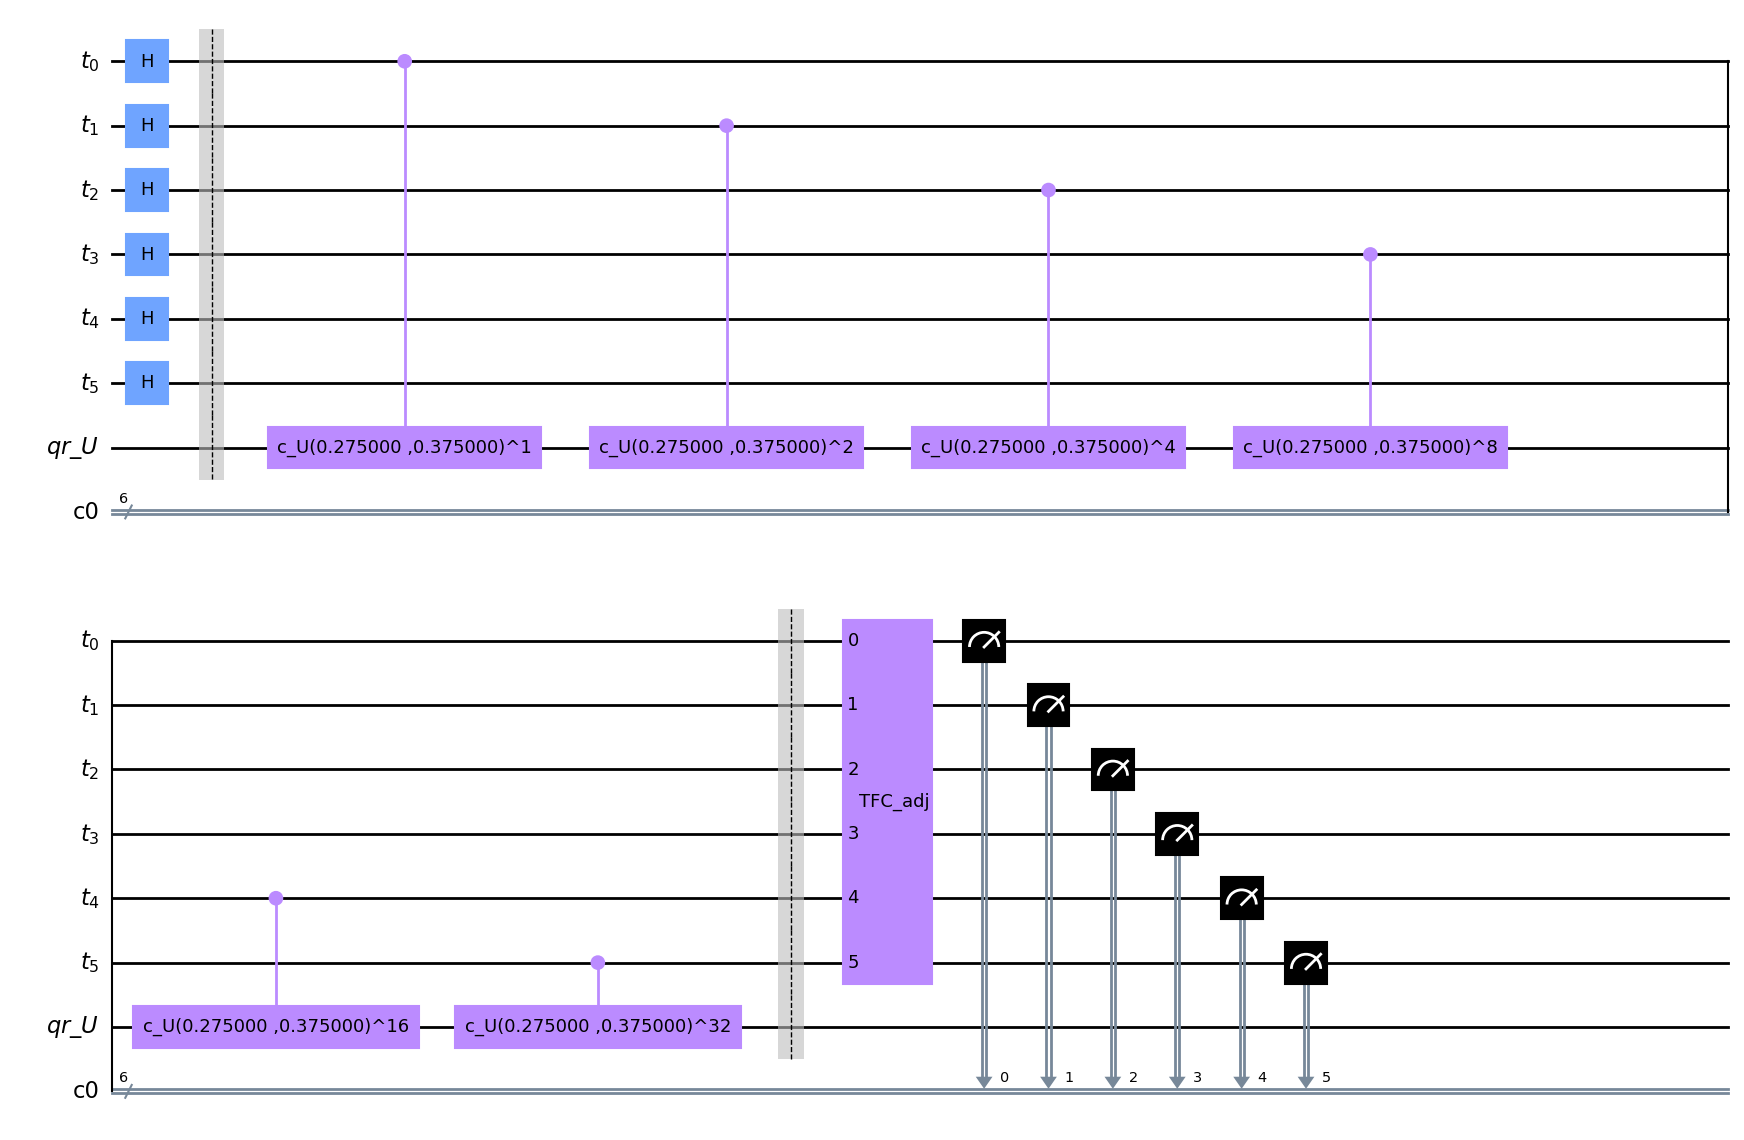

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 6 # la dimensión del registro de evaluación 
n = 1 # la dimensiónd el espacio de representación del opeador U

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)

qpe = QuantumCircuit(qrt,qra,crt)   

##########################################################################
#inicializamos la ancilla en un autoestado |u> =|0> o |u> = |1>
#qpe.x(qra)   
##########################################################################


qpe.h(range(t))
qpe.barrier()

# aplicamos los operadores controlados c-U^j 
for j in range(t):
    qpe.append(c_Uop(phi0,phi1,2**j),[qrt[j]]+qra[:])
    

qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)


qpe.measure(qrt,crt)

qpe.draw(output="mpl")

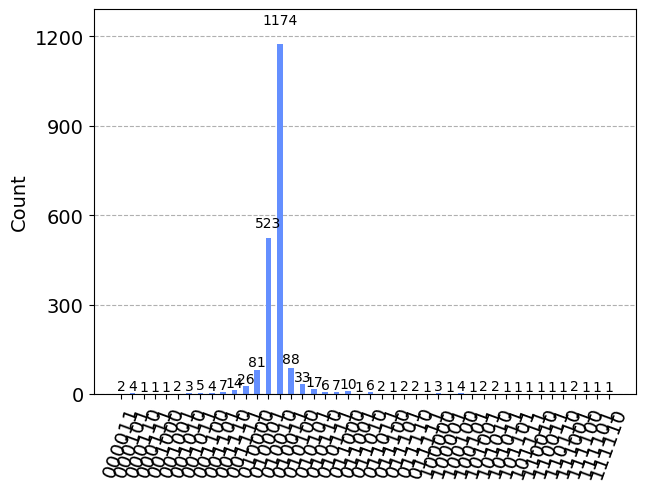

In [5]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram
results = execute(qpe, M_backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [6]:
max(counts, key=counts.get)

'010010'

In [7]:
a_resultante = int(max(counts, key=counts.get),2)

# Seleccionamos el autovalor asociado a |u> 
phi = phi0  # si |0>
#phi = phi1   # si |1>

print('el valor de phi original era =', phi)

print('la mejor aproximación al valor verdadero es a/2^t =', a_resultante*2**(-t))

print('el error relativo es delta/(2^t phi) =', (phi -a_resultante*2**(-t))/phi)

el valor de phi original era = 0.275
la mejor aproximación al valor verdadero es a/2^t = 0.28125
el error relativo es delta/(2^t phi) = -0.022727272727272645


In [8]:
t_seed = 3

a0 = 1.
delta0 = 0.1
phi0 = (a0+ delta0)*2.**(-t_seed) 

a1 = 3.
delta1 = 0.1
phi1 =(a1+ delta1)*2.**(-t_seed) 

print('phi0=', phi0, ' ->   2^t*phi0 = a0 + delta0 = ', 2**t_seed*phi0 , ' , a0 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi0),'b').zfill(t_seed) )
print('phi1=', phi1, ' ->   2^t*phi1 = a1 + delta1 = ', 2**t_seed*phi1 , ' , a1 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi1),'b').zfill(t_seed) )


phi0= 0.1375  ->   2^t*phi0 = a0 + delta0 =  1.1  , a0 = 1 => 001
phi1= 0.3875  ->   2^t*phi1 = a1 + delta1 =  3.1  , a1 = 1 => 011


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


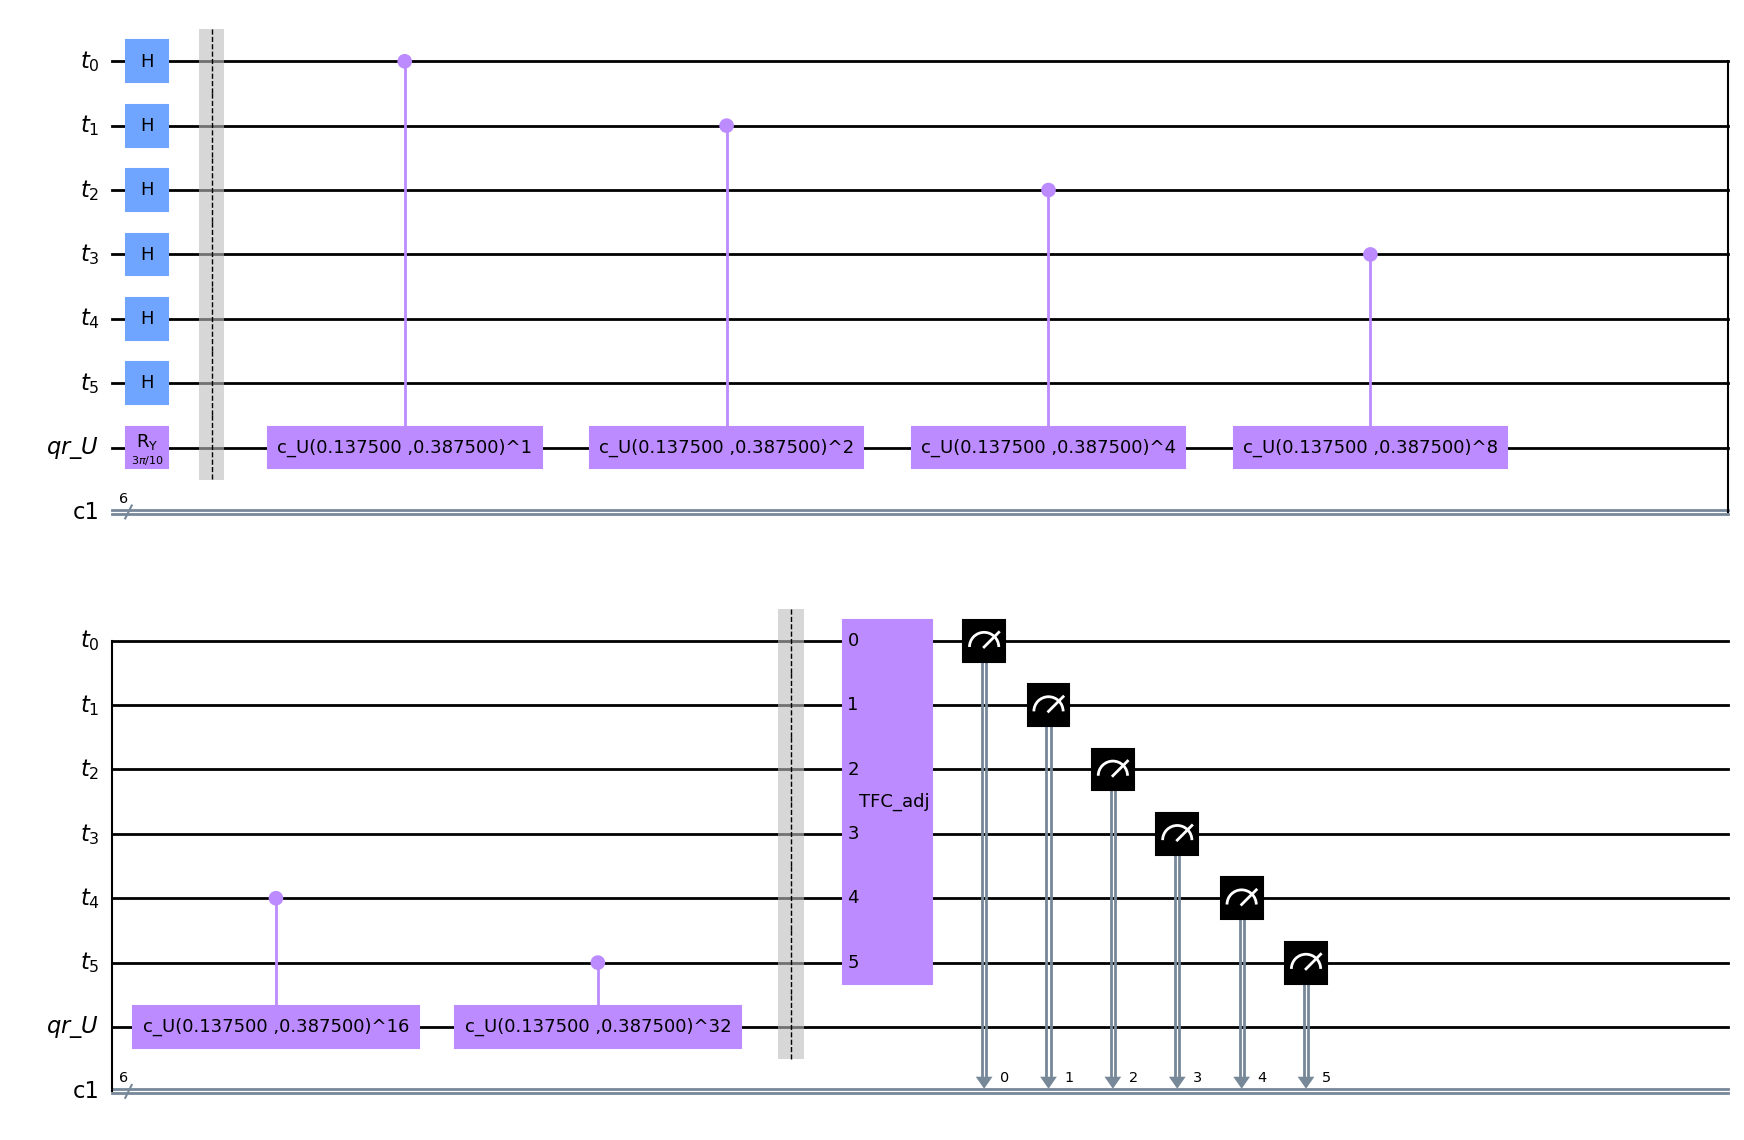

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 6 # la dimensión del registro de evaluación 
n = 1 # la dimensiónd el espacio de representación del opeador U

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)

qpe = QuantumCircuit(qrt,qra,crt)   

##########################################################################
#inicializamos la ancilla en una combinación cos(th/2)|0> + sin(th/2)|1>
theta = 2*np.pi*0.15 
qpe.ry(theta,qra) 
##########################################################################

qpe.h(range(t))
qpe.barrier()

# aplicamos los operadores controlados c-U^j 
for j in range(t):
    qpe.append(c_Uop(phi0,phi1,2**j),[qrt[j]]+qra[:])
#    qpe.cp(2*np.pi*phi1*(2**j), qrt[j], qra); # This is C-U
    

qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)


qpe.measure(qrt,crt)

qpe.draw(output="mpl")

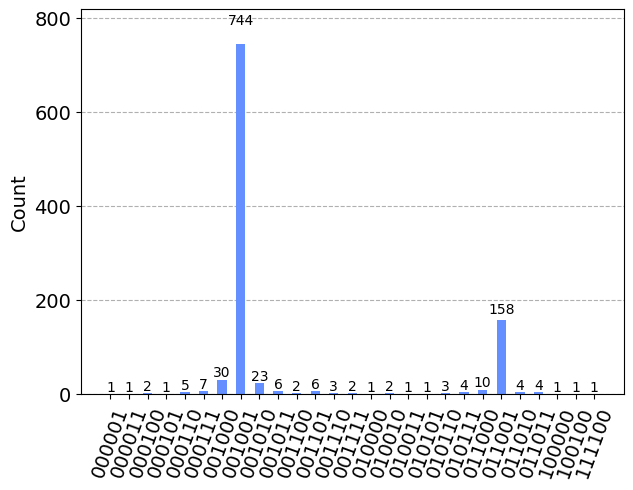

In [10]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram
results = execute(qpe, M_backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)

In [11]:
{2,4,7,8,11,13}   # comprimos con 15
m=7
N=15
[m**i%N for i in range(17)]

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1]

In [12]:
def c_amod15(m, power):
    """Controlled multiplication by a mod 15"""
    if m not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if m in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if m in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if m in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if m in [7,11,13]:
            for q in range(4):
                U.x(q)
#    print(U)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (m, power)
    c_U = U.control()
    return c_U

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


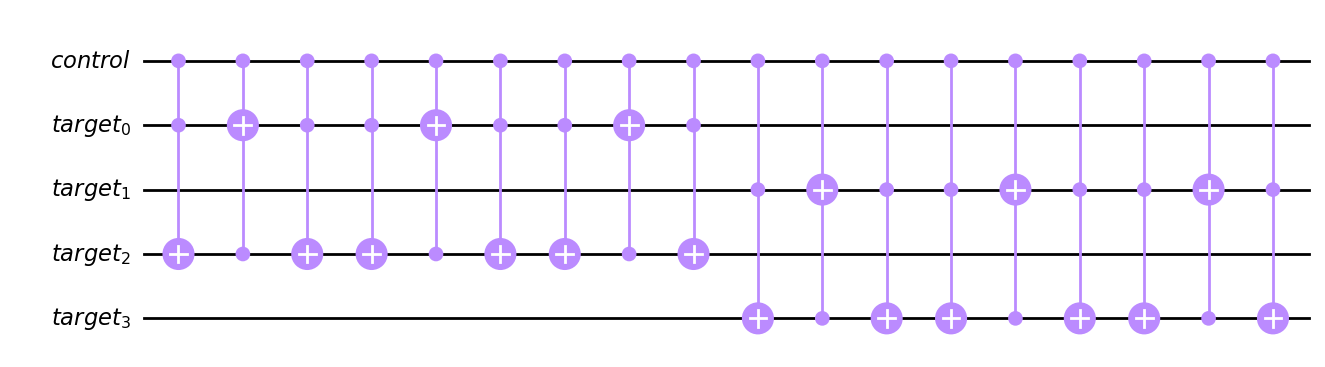

In [13]:
c_amod15(4,3 ).definition.draw('mpl')

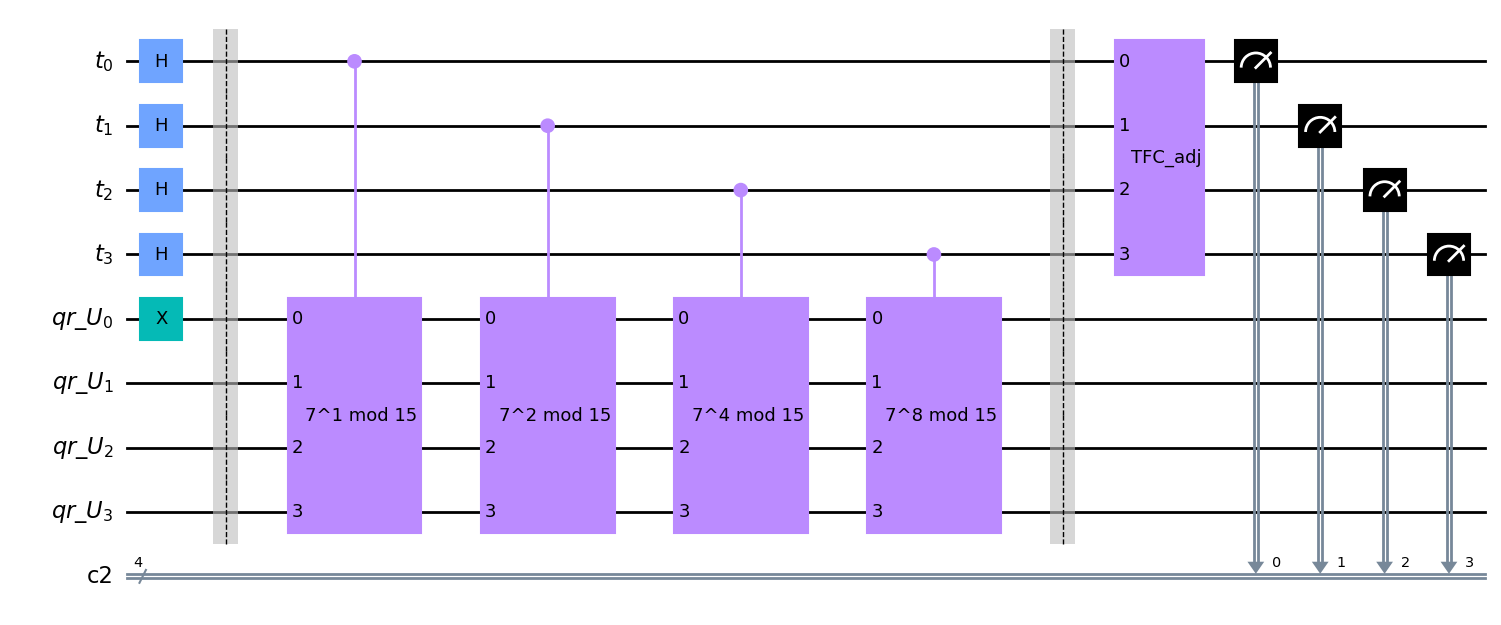

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 4 
n = 4 
m = 7

qr=QuantumRegister(t,name="t")
ar=QuantumRegister(4,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
cr=ClassicalRegister(t)

qc = QuantumCircuit(qr,ar,cr)   

qc.x(ar[0]) #  inicializamos la ancilla al autoestado de P(phi) ->  |u> = |1>
#qpe.h(ar[0]) #  

qc.h(range(n))
qc.barrier()

# aplicamos los operadores controlados c-U^j 
for q in range(t):
    qc.append(c_amod15(m, 2**q), [qr[q]] + ar[:])


qc.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qc.append(TFC_adj(t),qr)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)


qc.measure(qr,cr)

qc.draw(output="mpl")

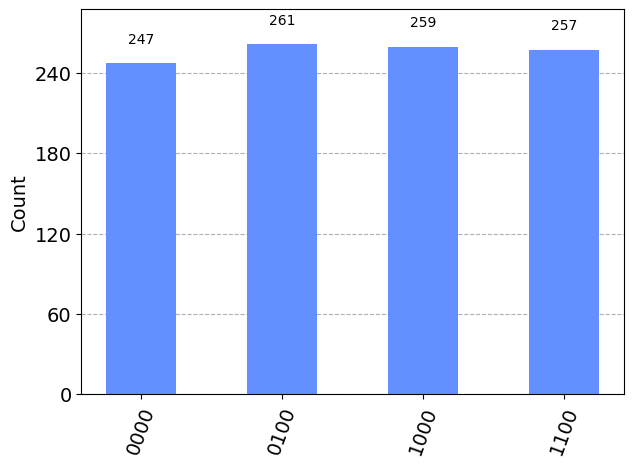

In [15]:
from qiskit import Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

job = execute(qc,M_simulator,shots = 1024)
counts = job.result().get_counts()
counts

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [16]:
Ns_list = sorted([int(keys,2) for  keys in counts])[1:] 
print('[2^ts/r] ~ ', Ns_list)

# dividiendo por 2**t
phis_list = [Ns_list[i]/2**t for i in range(len(Ns_list))]
print('phi_s', phis_list)


[2^ts/r] ~  [4, 8, 12]
phi_s [0.25, 0.5, 0.75]


In [17]:
differences = [int((phis_list[s+1]-phis_list[s])**(-1)) for s in range(len(phis_list)-1)]

print(differences)

print('el valor entero del promedio =', int(sum(differences)/len(differences)))

[4, 4]
el valor entero del promedio = 4


In [18]:
from fractions import Fraction
print('[s/r]=',[Fraction(phis_list[i]).limit_denominator(20) for i in range(int(len(phis_list)))])

[s/r]= [Fraction(1, 4), Fraction(1, 2), Fraction(3, 4)]
